In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
  # Replace with your file path
data = pd.read_csv('Cleaned_SVM.csv')

# Encoding categorical variables
label_encoder = LabelEncoder()
data['team_encoded'] = label_encoder.fit_transform(data['team'])
data['team_opp_encoded'] = label_encoder.transform(data['team_opp'])

# Selecting the specified features
selected_features = data[['team_encoded', 'team_opp_encoded', 'season', 'fg%', '3p%', 'ft%', 
                          'orb', 'drb', 'orb%', 'drb%', 'ft%_max', 'fg%_max', '3p%_max', 
                          'fg%_opp', '3p%_opp', 'ft%_opp', 'orb_opp', 'trb_opp', 'orb%_opp', 
                          'drb%_opp', 'ft%_max_opp', 'fg%_max_opp', '3p%_max_opp']]

# Scaling features
scaler = StandardScaler()
selected_features_scaled = scaler.fit_transform(selected_features)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features_scaled, data['won'], test_size=0.2, random_state=42)

# Training the SVM model with a linear kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [46]:
# Evaluating the model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)


Accuracy: 0.8672292545710267
Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.87      0.87      1749
        True       0.87      0.86      0.87      1806

    accuracy                           0.87      3555
   macro avg       0.87      0.87      0.87      3555
weighted avg       0.87      0.87      0.87      3555



In [72]:
def predict_winner_recent_season(team1, team2, model, label_encoder, scaler, data):
    # Encode the team names
    team1_encoded = label_encoder.transform([team1])[0]
    team2_encoded = label_encoder.transform([team2])[0]

    # Filtering data for the most recent season (2022)
    recent_season_data = data[data['season'] == 2022]

    # Create a feature vector using mean values from the most recent season
    mean_values_recent_season = recent_season_data.mean().to_dict()
    feature_vector = pd.DataFrame([mean_values_recent_season])
    feature_vector['team_encoded'] = team1_encoded
    feature_vector['team_opp_encoded'] = team2_encoded

    # Ensure correct order of columns as used in model training
    feature_vector = feature_vector[selected_features.columns]

    # Scale the feature vector
    feature_vector_scaled = scaler.transform(feature_vector)

    # Predict outcome
    prediction = model.predict(feature_vector_scaled)[0]
    return team1 if prediction else team2

# Example prediction using the most recent season
team1 = 'MIA'  # Replace with an actual team name from your dataset
team2 = 'GSW'  # Replace with another actual team name from your dataset
winner = predict_winner_recent_season(team1, team2, svm_model, label_encoder, scaler, data)
print(f"Predicted winner for the 2022 season between {team1} and {team2}: {winner}")


Predicted winner for the 2022 season between MIA and GSW: GSW


/var/folders/35/3hw9ds4j4xv060bywk0frfdw0000gn/T/ipykernel_43020/2140859008.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_values_recent_season = recent_season_data.mean().to_dict()


In [74]:
# Training and evaluating SVM models with different kernels
kernels = ['linear', 'rbf', 'poly']
accuracies = {}
classification_reports = {}

for kernel in kernels:
    # Training the SVM classifier with the specified kernel
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)

    # Evaluating the model
    y_pred = svm_model.predict(X_test)
    accuracies[kernel] = accuracy_score(y_test, y_pred)
    classification_reports[kernel] = classification_report(y_test, y_pred)

    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracies[kernel]}")
    print("Classification Report:")
    print(classification_reports[kernel])
    print("-" * 50)

# Creating a comparison table for accuracies and classification metrics
comparison_factors = {
    "Kernel": [],
    "Accuracy": [],
    "Precision (False)": [],
    "Precision (True)": [],
    "Recall (False)": [],
    "Recall (True)": [],
    "F1-Score (False)": [],
    "F1-Score (True)": []
}

for kernel, report in classification_reports.items():
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    comparison_factors["Kernel"].append(kernel)
    comparison_factors["Accuracy"].append(accuracies[kernel])
    comparison_factors["Precision (False)"].append(report_dict['False']['precision'])
    comparison_factors["Precision (True)"].append(report_dict['True']['precision'])
    comparison_factors["Recall (False)"].append(report_dict['False']['recall'])
    comparison_factors["Recall (True)"].append(report_dict['True']['recall'])
    comparison_factors["F1-Score (False)"].append(report_dict['False']['f1-score'])
    comparison_factors["F1-Score (True)"].append(report_dict['True']['f1-score'])

# Converting to DataFrame for better visualization
comparison_df = pd.DataFrame(comparison_factors)
print(comparison_df)

Kernel: linear
Accuracy: 0.8672292545710267
Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.87      0.87      1749
        True       0.87      0.86      0.87      1806

    accuracy                           0.87      3555
   macro avg       0.87      0.87      0.87      3555
weighted avg       0.87      0.87      0.87      3555

--------------------------------------------------
Kernel: rbf
Accuracy: 0.8655414908579465
Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.87      0.86      1749
        True       0.88      0.86      0.87      1806

    accuracy                           0.87      3555
   macro avg       0.87      0.87      0.87      3555
weighted avg       0.87      0.87      0.87      3555

--------------------------------------------------
Kernel: poly
Accuracy: 0.8582278481012658
Classification Report:
              precision    recall  f1-score   su

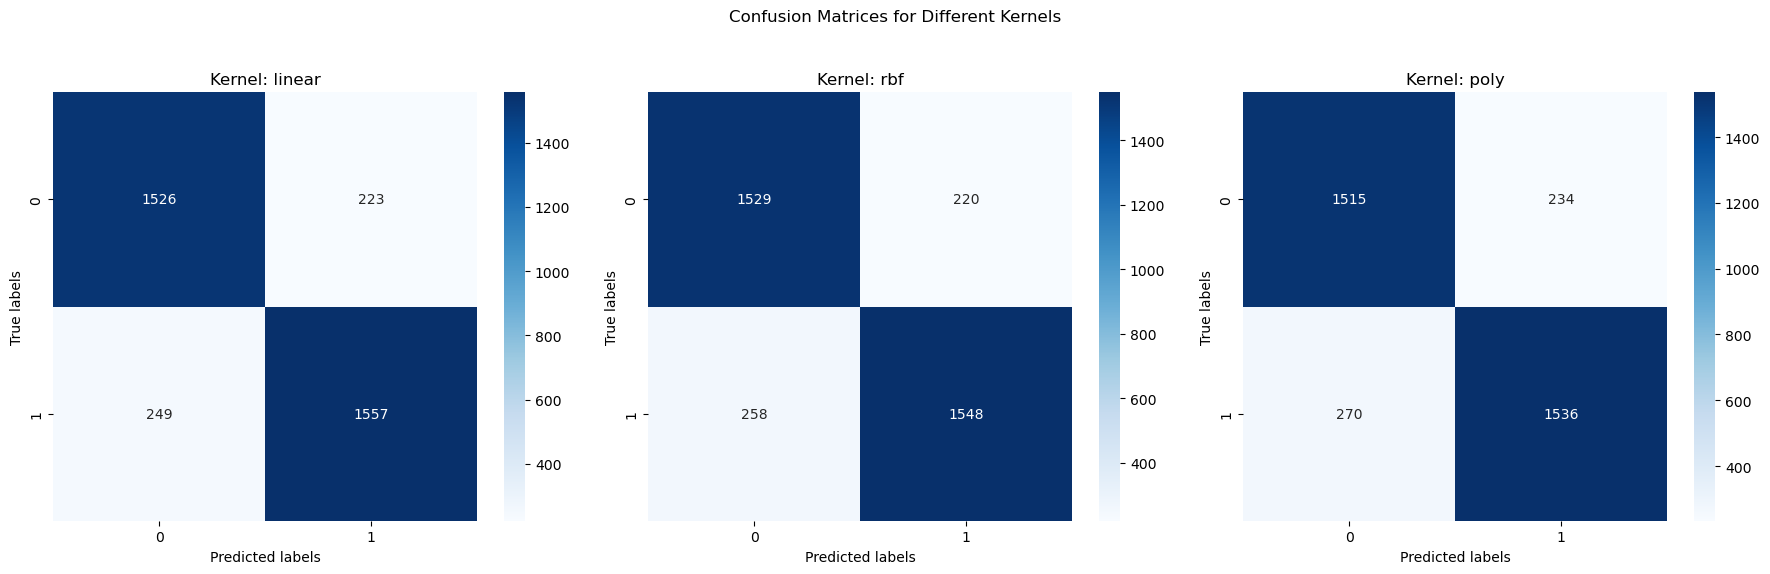

In [77]:
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
kernels = ['linear', 'rbf', 'poly']

# Plotting the confusion matrices for each kernel
fig, axes = plt.subplots(1, len(kernels), figsize=(18, 6))
fig.suptitle('Confusion Matrices for Different Kernels')

for i, kernel in enumerate(kernels):
    # Training the SVM classifier with the specified kernel
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = svm_model.predict(X_test)

    # Computing the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Kernel: {kernel}')
    axes[i].set_xlabel('Predicted labels')
    axes[i].set_ylabel('True labels')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
def predict_winner_recent_season(team1, team2, model, label_encoder, scaler, data):
    # Encode the team names
    team1_encoded = label_encoder.transform([team1])[0]
    team2_encoded = label_encoder.transform([team2])[0]

    # Filtering data for the most recent season (2022)
    recent_season_data = data[data['season'] == 2022]
    home = ['team_encoded','fg%','3p%','ft%','orb','drb','orb%','drb%','ft%_max','fg%_max','3p%_max']
    opp = ['team_opp_encoded','fg%_opp','3p%_opp','ft%_opp','orb_opp','trb_opp','orb%_opp','drb%_opp','ft%_max_opp','fg%_max_opp','3p%_max_opp']
    
    x = data[data['team_encoded'] == team1_encoded]
    y = data[data['team_opp_encoded'] == team2_encoded]
    
    x_mean = x.mean().to_dict()
    y_mean = y.mean().to_dict()
    
    # Create a feature vector using mean values from the most recent season
    mean_values_recent_season = recent_season_data.mean().to_dict()
    feature_vector = pd.DataFrame([mean_values_recent_season])
    feature_vector['team_encoded'] = team1_encoded
    feature_vector['team_opp_encoded'] = team2_encoded

    # Ensure correct order of columns as used in model training
    feature_vector = feature_vector[selected_features.columns]

    # Scale the feature vector
    feature_vector_scaled = scaler.transform(feature_vector)

    # Predict outcome
    prediction = model.predict(feature_vector_scaled)[0]
    return team1 if prediction else team2

# Example prediction using the most recent season
team1 = 'MIA'  # Replace with an actual team name from your dataset
team2 = 'GSW'  # Replace with another actual team name from your dataset
winner = predict_winner_recent_season(team1, team2, svm_model, label_encoder, scaler, data)
print(f"Predicted winner for the 2022 season between {team1} and {team2}: {winner}")


In [153]:
mapping[team1]

15

In [154]:
def predict_2(team1, team2, model, label_encoder, scaler, data):    
    mapping = {'ATL': 0, 'BOS': 1, 'BRK': 2, 'CHI': 3, 'CHO': 4, 'CLE': 5, 'DAL': 6, 'DEN': 7, 'DET': 8, 'GSW': 9, 'HOU': 10, 'IND': 11, 'LAC': 12, 'LAL': 13, 'MEM': 14, 'MIA': 15, 'MIL': 16, 'MIN': 17, 'NOP': 18, 'NYK': 19, 'OKC': 20, 'ORL': 21, 'PHI': 22, 'PHO': 23, 'POR': 24, 'SAC': 25, 'SAS': 26, 'TOR': 27, 'UTA': 28, 'WAS': 29}

    team1_encoded = mapping[team1]
    team2_encoded = mapping[team2]
    
    recent_season_data = data[data['season'] == 2022]

    select_cols = ['team_encoded', 'team_opp_encoded', 'season', 'fg%', '3p%', 'ft%', 
                              'orb', 'drb', 'orb%', 'drb%', 'ft%_max', 'fg%_max', '3p%_max', 
                              'fg%_opp', '3p%_opp', 'ft%_opp', 'orb_opp', 'trb_opp', 'orb%_opp', 
                              'drb%_opp', 'ft%_max_opp', 'fg%_max_opp', '3p%_max_opp']
    home = ["season",'team_encoded','fg%','3p%','ft%','orb','drb','orb%','drb%','ft%_max','fg%_max','3p%_max']
    opp = ['team_opp_encoded','fg%_opp','3p%_opp','ft%_opp','orb_opp','trb_opp','orb%_opp','drb%_opp','ft%_max_opp','fg%_max_opp','3p%_max_opp']

    x = recent_season_data[recent_season_data['team_encoded'] == team1_encoded]
    y = recent_season_data[recent_season_data['team_opp_encoded'] == team2_encoded]

    x_mean = x.mean().to_dict()
    y_mean = y.mean().to_dict()
    temp = (pd.concat([pd.DataFrame([x_mean])[home], pd.DataFrame([y_mean])[opp]],axis = 1))
    temp = temp[select_cols]
    feature_vector_scaled = scaler.transform(temp)

    # Predict outcome
    prediction = model.predict(feature_vector_scaled)[0]
    return team1 if prediction else team2

In [156]:
team1 = 'MIA'  # Replace with an actual team name from your dataset
team2 = 'GSW'  # Replace with another actual team name from your dataset
winner = predict_2(team1, team2, svm_model, label_encoder, scaler, data)
print(f"Predicted winner for the 2022 season between {team1} and {team2}: {winner}")

Predicted winner for the 2022 season between MIA and GSW: GSW


/var/folders/35/3hw9ds4j4xv060bywk0frfdw0000gn/T/ipykernel_43020/1699504559.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  x_mean = x.mean().to_dict()
/var/folders/35/3hw9ds4j4xv060bywk0frfdw0000gn/T/ipykernel_43020/1699504559.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  y_mean = y.mean().to_dict()


In [147]:
svm_model

SVC(kernel='poly')

In [146]:
scaler

StandardScaler()

In [163]:
import pickle
scaler_file = "scaler.sav"
svm_file = "model.sav"
pickle.dump(scaler, open(scaler_file,"wb"))
pickle.dump(svm_model, open(svm_file,"wb"))

In [166]:
recent_season_data = data[data['season'] == 2022]
recent_season_data.to_csv("data.csv", index = False)

In [164]:
model_2 = pickle.load(open(svm_file,"rb"))


team1 = 'MIA'  # Replace with an actual team name from your dataset
team2 = 'GSW'  # Replace with another actual team name from your dataset
winner = predict_2(team1, team2, model_2, label_encoder, scaler, data)
print(f"Predicted winner for the 2022 season between {team1} and {team2}: {winner}")         
                      

Predicted winner for the 2022 season between MIA and GSW: GSW


/var/folders/35/3hw9ds4j4xv060bywk0frfdw0000gn/T/ipykernel_43020/1699504559.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  x_mean = x.mean().to_dict()
/var/folders/35/3hw9ds4j4xv060bywk0frfdw0000gn/T/ipykernel_43020/1699504559.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  y_mean = y.mean().to_dict()
